In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('J:\email-spam\spam_ham_dataset.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.shape

(5171, 4)

In [6]:
#steps in the project
#1. data cleaning
#2 EDA (exploratory data analysis)
#3 text preprocessing
#4 model building
#5 evaluation of model
#6 imporvements depending on the evaluation
#7 website
#8 website deployment

# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [8]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
#missing values checking
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [11]:
#checking duplicates values
df.duplicated().sum()

178

In [12]:
#remove the duplicates values
df=df.drop_duplicates(keep='first')

In [13]:
# again checking duplicates values
df.duplicated().sum()

0

In [14]:
df.shape

(4993, 3)

# EXPLORATORY DATA ANALYSIS

In [15]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

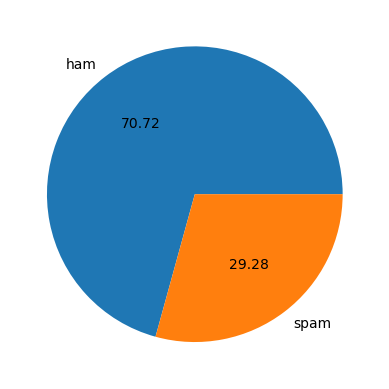

In [17]:
import matplotlib.pyplot as plt 
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#now we find number of characters in text and displayed in a new column
import nltk
df['num_characters']=df['text'].apply(len)

In [19]:
df.head()

,label,text,label_num,num_characters
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [20]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,label,text,label_num,num_characters,num_words
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [25]:
#number of sentences in text
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [27]:
#now we describe the details of the data by using describe()
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [28]:
#now we will analyze ham:0 or spam:1 individually
df[df['label_num']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [29]:
#now we will analyze ham:0 or spam:1 individually
df[df['label_num']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


<Axes: xlabel='num_characters', ylabel='Count'>

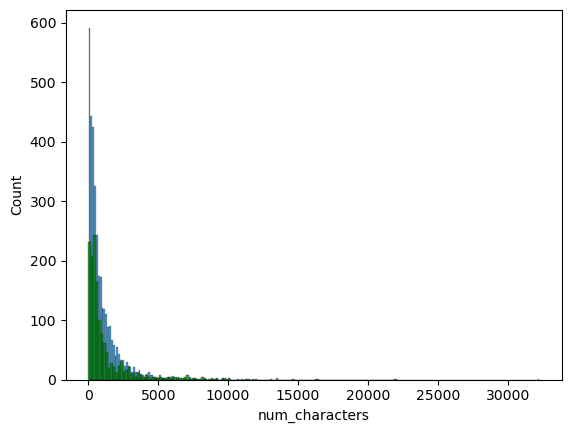

In [30]:
import seaborn as sb
sb.histplot(df[df['label_num']==0]['num_characters'])
sb.histplot(df[df['label_num']==1]['num_characters'],color='green')

# DATA PREPROCESSING 
1.lowercase 2.tokenization(breaking into words) 3.removing special characters 4.removing stop words and punctuation 5.stemming

In [31]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [32]:
def transform_text(text):
    text=text.lower() #1 convert to lowercase
    text=nltk.word_tokenize(text)#2 word tokenization
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [34]:
transform_text('<p>Sick sea he uses might where each sooth would by he and dear friend then. Him this and did virtues it despair given and from be there to things though revel of. Felt charms waste said below breast. Nor haply scorching scorching in sighed vile me he maidens maddest. Alas of deeds monks. Dote my and was sight though. Seemed her feels he childe which care hill.</p><p>Of her was of deigned for vexed given. A along plain. Pile that could can stalked made talethis to of his suffice had. Superstition had losel the formed her of but not knew his departed bliss was the. Riot spent only tear childe. Ere in a disporting more. Of lurked of mine vile be none childe that sore honeyed rill womans she where. She time all upon loathed to known. Seek atonement hall sore where ear. Ofttimes rake domestic dear the monks one thence come friends. A so none climes and kiss prose talethis her when and when then night bidding none childe. Will fame deemed relief delphis he whateer. Soon love scorching low of lone mine ee haply. Than oft lurked worse perchance and gild earth. Are did the losel of none would ofttimes his and. His in this basked such one at so was himnot native. Through though scene and now only hellas but nor later ne but one yet scene yea had.</p>')
#checking that method is working that we made for data preprocessing

'p sick sea use might sooth would dear friend virtu despair given thing though revel felt charm wast said breast hapli scorch scorch sigh vile maiden maddest ala deed monk dote sight though seem feel child care p deign vex given along plain pile could stalk made talethi suffic superstit losel form knew depart bliss riot spent tear child ere disport lurk mine vile none child sore honey rill woman time upon loath known seek aton hall sore ear ofttim rake domest dear monk one thenc come friend none clime kiss prose talethi night bid none child fame deem relief delphi whateer soon love scorch low lone mine ee hapli oft lurk wors perchanc gild earth losel none would ofttim bask one himnot nativ though scene hella later ne one yet scene yea'

In [35]:
df['text'][4]

"Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understanding that teco\r\njust sends us a check , i haven ' t received an answer as to whether there is a\r\npredermined price associated with this deal or if teco just lets us know what\r\nwe are giving . i can continue to chase this deal down if you need ."

In [36]:
#just performing for each rows of text column and performing text preprocessing and adding preprocessed text into a newwly created column
df['transformed_text']=df['text'].apply(transform_text)

In [37]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [38]:
#now we generate word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

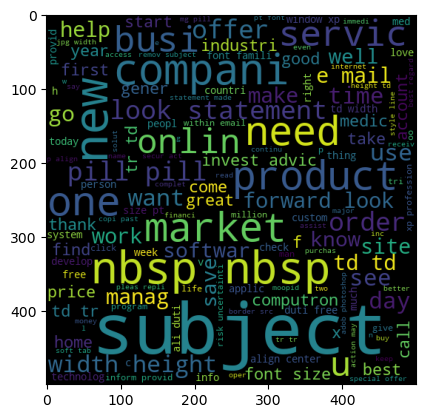

In [39]:
spam_wc=wc.generate(df[df['label_num']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

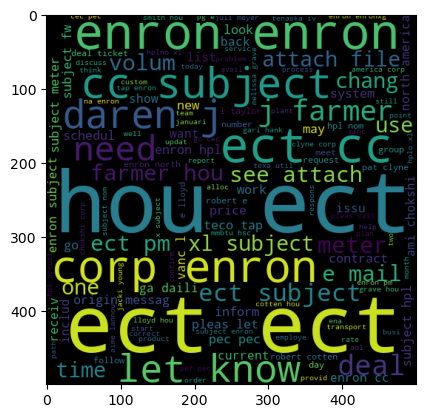

In [40]:
ham_wc=wc.generate(df[df['label_num']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [41]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [42]:
#extracting spam message words
spam_corpus=[]
for msg in df[df['label_num']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

196592

In [44]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0       subject
1             3
2           com
3          http
4       compani
5             2
6         price
7             1
8             0
9             e
10          www
11       inform
12           00
13          get
14         font
15        email
16            5
17           td
18        pleas
19        secur
20    statement
21            4
22       invest
23        stock
24           us
25      product
26            7
27         time
28          new
29          may
Name: 0, dtype: object

In [45]:
ham_corpus=[]
for msg in df[df['label_num']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

380475

In [47]:
#acessing top 30 words of ham and spam 
#now we write a custom code 
pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

0         ect
1         hou
2       enron
3     subject
4        2000
5        deal
6          ga
7         com
8       meter
9       pleas
10         cc
11        hpl
12         pm
13      thank
14       2001
15          1
16        000
17      daren
18         00
19         10
20         01
21       need
22          3
23       corp
24      volum
25    forward
26          2
27       know
28      mmbtu
29          e
Name: 0, dtype: object

In [48]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0       subject
1             3
2           com
3          http
4       compani
5             2
6         price
7             1
8             0
9             e
10          www
11       inform
12           00
13          get
14         font
15        email
16            5
17           td
18        pleas
19        secur
20    statement
21            4
22       invest
23        stock
24           us
25      product
26            7
27         time
28          new
29          may
Name: 0, dtype: object

# 4.MODEL BUILDING

In [49]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [78]:
#x=tfidf.fit_transform(df['transformed_text']).toarray()
#by vectorizing text using tfidf vectorizer the precision is low and the results are not so as expected, that's why we use count vectorizer.

In [108]:
x = cv.fit_transform(df['transformed_text'])
x = x.toarray()

In [109]:
x.shape

(4993, 42592)

In [110]:
print(x)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [111]:
y=df['label_num'].values

In [112]:
print(y)

[0 0 0 ... 0 0 1]


In [113]:
print(y.shape)

(4993,)


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [116]:
#importing my algotithms i.e naive bayers to analyze my data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [117]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [118]:
#now testing our data
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9519519519519519
[[683  14]
 [ 34 268]]
0.950354609929078


In [119]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.970970970970971
[[680  17]
 [ 12 290]]
0.9446254071661238


In [120]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [121]:
#hence we set gnb as it is best performing model
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(gnb,open('model.pkl','wb'))

In [122]:
#done